# SMA With Bollinger Bands 

In [98]:
#Declaring imports for importing modules

import pandas as pd
import numpy as np
from pprint import pprint
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import optimize

import math

from sklearn import cluster, mixture # For clustering 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
import warnings

In [2]:
#Reading Amazon history data into Dataframe
Amazon_data = pd.read_excel("AMZN.xlsx")

In [3]:
Amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,672.32,672.32,627.51,639.10,69804
1,2016-01-05,638.05,646.91,627.65,634.25,44335
2,2016-01-06,623.77,639.79,618.64,635.20,40167
3,2016-01-07,620.55,630.00,605.21,606.00,54784
4,2016-01-08,617.05,624.14,606.00,608.36,42130


In [4]:
#Checking for null values
Amazon_data.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
Amazon_data.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,671,671.000000,671.000000,671.000000,671.000000,671.000000
unique,671,NaN,NaN,NaN,NaN,NaN
top,2016-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,1023.908525,1034.381520,1012.417288,1024.641923,29238.222057
std,NaN,372.248847,376.618811,368.023159,373.151363,14882.017989
min,NaN,488.000000,496.000000,474.000000,484.000000,10189.000000
25%,NaN,760.650000,768.045000,755.410000,760.425000,19506.000000


In [6]:
df=Amazon_data.to_csv("./data.csv", sep=",")

In [7]:
Amazon_data.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,672.32,672.32,627.51,639.10,69804
1,2016-01-05,638.05,646.91,627.65,634.25,44335
2,2016-01-06,623.77,639.79,618.64,635.20,40167
3,2016-01-07,620.55,630.00,605.21,606.00,54784
4,2016-01-08,617.05,624.14,606.00,608.36,42130


In [8]:
# It will convert columns to float

Amazon_data['Open '] = Amazon_data['Open '].astype(float)
Amazon_data['Close '] = Amazon_data['Close '].astype(float)
Amazon_data['High'] = Amazon_data['High'].astype(float)
Amazon_data['Low'] = Amazon_data['Low'].astype(float)
Amazon_data['Volume'] = Amazon_data['Volume'].astype(float)


In [9]:
Amazon_data['Price'] = (Amazon_data['Close '] + Amazon_data['High'] + Amazon_data['Low'])/3

In [10]:
Amazon_data.head()

,Date,Open,High,Low,Close,Volume,Price
0,2016-01-04,672.32,672.32,627.51,639.10,69804.0,646.310000
1,2016-01-05,638.05,646.91,627.65,634.25,44335.0,636.270000
2,2016-01-06,623.77,639.79,618.64,635.20,40167.0,631.210000
3,2016-01-07,620.55,630.00,605.21,606.00,54784.0,613.736667
4,2016-01-08,617.05,624.14,606.00,608.36,42130.0,612.833333


In [84]:
close_price = Amazon_data['Close ']
price_t = close_price[1:].reshape(-1,1)
price_t_back = close_price[0:-1].reshape(-1,1)
Rt = np.log(price_t/price_t_back)
Rt

array([[ -7.61773818e-03],
       [  1.49671145e-03],
       [ -4.70599239e-02],
       [  3.88682593e-03],
       [  1.49284507e-02],
       [  2.86225019e-03],
       [ -6.55294094e-02],
       [  2.88890099e-02],
       [ -4.50534358e-02],
       [  7.50636325e-03],
       [  0.00000000e+00],
       [ -3.04811906e-03],
       [  4.12817231e-02],
       [  1.35493443e-03],
       [ -3.34330753e-05],
       [ -3.68447913e-03],
       [ -8.03223888e-02],
       [  6.42543899e-02],
       [ -1.98026273e-02],
       [ -4.26352316e-02],
       [ -3.47154506e-02],
       [ -5.40730265e-03],
       [ -5.80044578e-02],
       [ -3.14193909e-02],
       [ -1.03300449e-04],
       [  2.24728559e-02],
       [  1.82168985e-02],
       [  6.13074203e-03],
       [  3.10775100e-02],
       [  2.11617091e-02],
       [ -1.82036070e-02],
       [  2.11558317e-02],
       [  4.13368066e-02],
       [ -1.23386084e-02],
       [  9.11106388e-03],
       [ -3.23799527e-03],
       [ -3.61011222e-03],
 

## Bollinger Bands

Bollinger Bands are calculated as follows:

Middle Band = 20 day moving average

Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 

Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)

In [11]:
demo_bc = pd.DataFrame()
demo_bc['Date']=Amazon_data['Date']
demo_bc['Open ']=Amazon_data['Open ']
demo_bc['High']=Amazon_data['High']
demo_bc['Low']=Amazon_data['Low']
demo_bc['Close ']=Amazon_data['Close ']
demo_bc['Volume']=Amazon_data['Volume']
demo_bc.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,672.32,672.32,627.51,639.10,69804.0
1,2016-01-05,638.05,646.91,627.65,634.25,44335.0
2,2016-01-06,623.77,639.79,618.64,635.20,40167.0
3,2016-01-07,620.55,630.00,605.21,606.00,54784.0
4,2016-01-08,617.05,624.14,606.00,608.36,42130.0


In [12]:
Amazon_data['Date'] = pd.to_datetime(Amazon_data['Date'])
Amazon_data.index = Amazon_data['Date']
del Amazon_data['Date']

In [13]:
Amazon_data.head()

,Open,High,Low,Close,Volume,Price
Date,,,,,,
2016-01-04,672.32,672.32,627.51,639.10,69804.0,646.310000
2016-01-05,638.05,646.91,627.65,634.25,44335.0,636.270000
2016-01-06,623.77,639.79,618.64,635.20,40167.0,631.210000
2016-01-07,620.55,630.00,605.21,606.00,54784.0,613.736667
2016-01-08,617.05,624.14,606.00,608.36,42130.0,612.833333


In [14]:
Amazon_data['20 ma'] = pd.stats.moments.rolling_mean(Amazon_data["Close "],5)

In [15]:
Amazon_data['20 sd'] = pd.stats.moments.rolling_std(Amazon_data["Close "],5)

In [16]:
Amazon_data['Upper Band'] = Amazon_data['20 ma'] + (Amazon_data['20 sd']*0.2)

In [17]:
Amazon_data['Lower Band'] = Amazon_data['20 ma'] - (Amazon_data['20 sd']*0.2)

In [18]:
Amazon_data.tail()

,Open,High,Low,Close,Volume,Price,20 ma,20 sd,Upper Band,Lower Band
Date,,,,,,,,,,
2018-08-24,1912.00,1916.01,1902.54,1905.00,16706.0,1907.850000,1892.674,17.470228,1896.168046,1889.179954
2018-08-27,1914.00,1933.00,1909.28,1932.30,17780.0,1924.860000,1903.834,21.833055,1908.200611,1899.467389
2018-08-28,1933.00,1941.78,1927.68,1935.01,18557.0,1934.823333,1916.636,15.661613,1919.768323,1913.503677
2018-08-29,1945.00,2001.85,1937.50,1999.75,39327.0,1979.700000,1935.012,39.127522,1942.837504,1927.186496
2018-08-30,2000.12,2025.58,1986.90,2002.15,41585.0,2004.876667,1954.842,43.704835,1963.582967,1946.101033


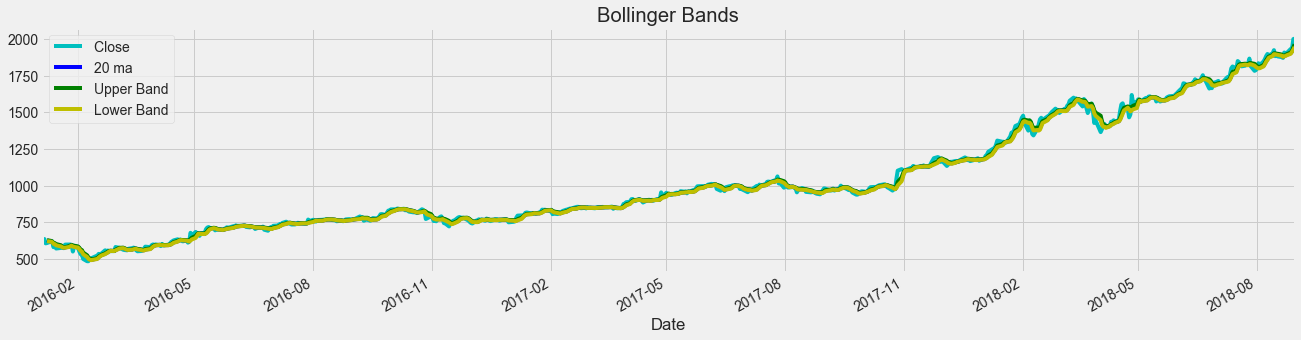

In [19]:
plt.style.use('fivethirtyeight')
Amazon_data.plot(y=['Close ','20 ma', 'Upper Band', 'Lower Band'], title='Bollinger Bands', color='c''b''g''y',
                  figsize=(20, 5))

In [22]:
fixedData = Amazon_data

In [23]:
Amazon_data['Previous Open']=Amazon_data['Open '].shift(1)
Amazon_data['Previous Volume']=Amazon_data['Volume'].shift(1)
Amazon_data.fillna(0, inplace=True)
Amazon_data.head(5)

,Open,High,Low,Close,Volume,Price,20 ma,20 sd,Upper Band,Lower Band,Previous Open,Previous Volume
Date,,,,,,,,,,,,
2016-01-04,672.32,672.32,627.51,639.10,69804.0,646.310000,0.000,0.000000,0.000000,0.000000,0.00,0.0
2016-01-05,638.05,646.91,627.65,634.25,44335.0,636.270000,0.000,0.000000,0.000000,0.000000,672.32,69804.0
2016-01-06,623.77,639.79,618.64,635.20,40167.0,631.210000,0.000,0.000000,0.000000,0.000000,638.05,44335.0
2016-01-07,620.55,630.00,605.21,606.00,54784.0,613.736667,0.000,0.000000,0.000000,0.000000,623.77,40167.0
2016-01-08,617.05,624.14,606.00,608.36,42130.0,612.833333,624.582,16.011156,627.784231,621.379769,620.55,54784.0


In [24]:
predict = pd.DataFrame()
predict['Open']=fixedData['Open ']
predict['Previous Open']=fixedData['Previous Open']
predict['Previous Volume']=fixedData['Previous Volume']
predict.head()

,Open,Previous Open,Previous Volume
Date,,,
2016-01-04,672.32,0.00,0.0
2016-01-05,638.05,672.32,69804.0
2016-01-06,623.77,638.05,44335.0
2016-01-07,620.55,623.77,40167.0
2016-01-08,617.05,620.55,54784.0


In [25]:
X = predict.ix[:,1:].values
y = predict.ix[:,0].values

In [26]:
y = y.reshape(len(X), 1)

In [27]:
beta_hat = np.dot(np.dot((np.linalg.inv(np.dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
beta_hat

array([[  1.00446276e+00],
       [ -9.46629894e-05]])

In [28]:
y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
y_hat
predict['RegressedOpen']=y_hat

In [29]:
residuals = y - y_hat #Residuals from OLS: Y - X*beta
residuals
predict['Residuals']=residuals

In [30]:
predict.head()

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals
Date,,,,,
2016-01-04,672.32,0.00,0.0,0.000000,672.320000
2016-01-05,638.05,672.32,69804.0,668.712545,-30.662545
2016-01-06,623.77,638.05,44335.0,636.700578,-12.930578
2016-01-07,620.55,623.77,40167.0,622.751405,-2.201405
2016-01-08,617.05,620.55,54784.0,618.133346,-1.083346


In [31]:
r_squared = 1 - ((np.var(residuals))/np.var(y))
r_squared

0.99298754169722647

In [32]:
np.mean(residuals)

1.1865640391407861

In [33]:
short_rolling = predict.rolling(window=5).mean()
# Calculating the long-window simple moving average
long_rolling = predict.rolling(window=50).mean()
#fixedData['long_rolling'] = long_rolling
long_rolling.tail()

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals
Date,,,,,
2018-08-24,1800.7634,1796.6034,26944.92,1802.070516,-1.307116
2018-08-27,1804.6424,1800.7634,26884.66,1806.254786,-1.612386
2018-08-28,1809.1024,1804.6424,26608.94,1810.177197,-1.074797
2018-08-29,1813.9992,1809.1024,26596.44,1814.658284,-0.659084
2018-08-30,1819.1416,1813.9992,26876.36,1819.550440,-0.408840


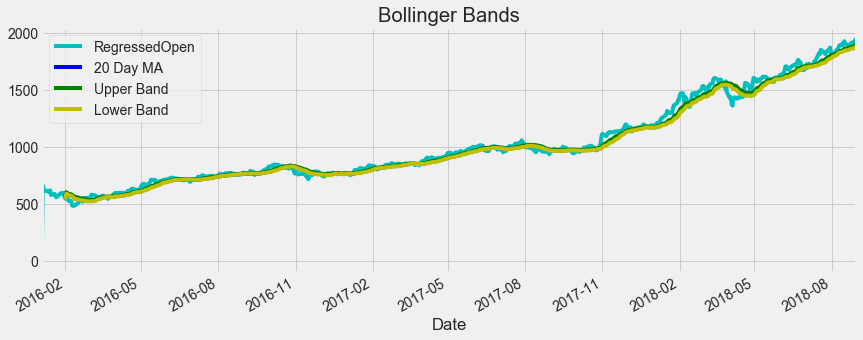

In [34]:
# Calculate 20 Day Moving Average, Std Deviation, Upper Band and Lower Band

predict['20 Day MA'] = predict['RegressedOpen'].rolling(window=20).mean()
predict['20 Day STD'] = predict['RegressedOpen'].rolling(window=20).std()
predict['Upper Band'] = predict['20 Day MA'] + (predict['20 Day STD'] * 0.2)
predict['Lower Band'] = predict['20 Day MA'] - (predict['20 Day STD'] * 0.2)

predict.plot(y=['RegressedOpen','20 Day MA', 'Upper Band', 'Lower Band'], title='Bollinger Bands', color='c''b''g''y',
                  figsize=(13, 5))

In [89]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()


Text(0.5,0,'Time')

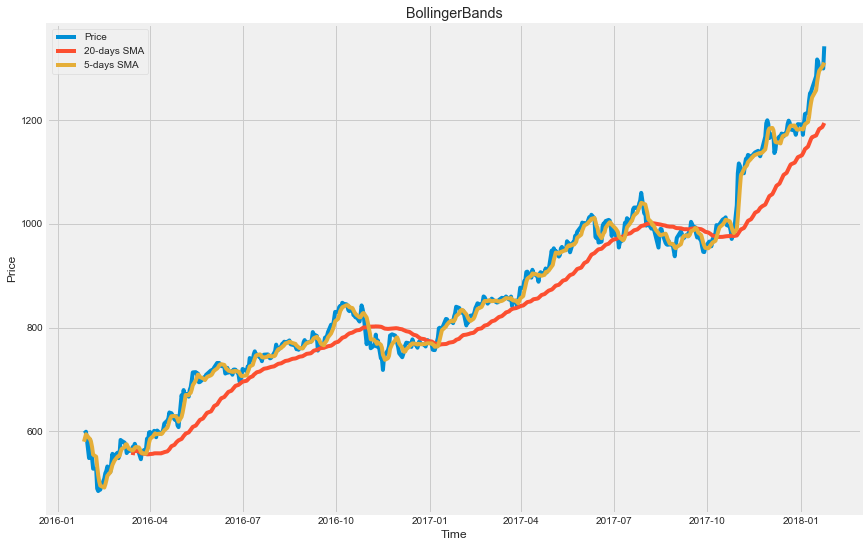

In [96]:
start_date = '2016-1-27'
end_date = '2018-01-24'

fig, ax = plt.subplots(figsize=(13,9))


ax.plot(predict.loc[start_date:end_date, :].index, predict.loc[start_date:end_date, 'RegressedOpen'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'RegressedOpen'], label = '20-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'RegressedOpen'], label = '5-days SMA')

ax.set_title('BollingerBands')
ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_xlabel('Time')

In [37]:
predict.head(5)

,Open,Previous Open,Previous Volume,RegressedOpen,Residuals,20 Day MA,20 Day STD,Upper Band,Lower Band
Date,,,,,,,,,
2016-01-04,672.32,0.00,0.0,0.000000,672.320000,NaN,NaN,NaN,NaN
2016-01-05,638.05,672.32,69804.0,668.712545,-30.662545,NaN,NaN,NaN,NaN
2016-01-06,623.77,638.05,44335.0,636.700578,-12.930578,NaN,NaN,NaN,NaN
2016-01-07,620.55,623.77,40167.0,622.751405,-2.201405,NaN,NaN,NaN,NaN
2016-01-08,617.05,620.55,54784.0,618.133346,-1.083346,NaN,NaN,NaN,NaN


In [38]:
from numpy import mean
X = predict['Open']
print(X[0:10])

Date
2016-01-04    672.32
2016-01-05    638.05
2016-01-06    623.77
2016-01-07    620.55
2016-01-08    617.05
2016-01-11    612.00
2016-01-12    620.84
2016-01-13    623.00
2016-01-14    583.33
2016-01-15    592.99
Name: Open, dtype: float64


In [39]:
def calclongshortBollinger(X, window):
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    averages = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        averages.append(yhat)
        history.append(obs)
    
    return averages

In [40]:
s_window = 5
l_window = 50

s_window_avg = calclongshortBollinger(X, s_window)
l_window_avg = calclongshortBollinger(X, l_window)

In [41]:
def calculatetradingsigBollinger():
    cross_over = [0] * len(l_window_avg)
    temp_signal = [0] * len(predict)
    signal = [0] * len(predict)
    BuyVal = []
    SellVal = []
    
    prev = -1
#     bought = False

    for i in range(len(l_window_avg)):
        cross_over[i] = l_window_avg[i] - s_window_avg[i]
        if i == 0:
            temp_signal[i] = 0
        else:
            # Buy
            if(cross_over[i] > 0):
                temp_signal[i] = 1
            #Sell
            if(cross_over[i] < 0):
                temp_signal[i] = -1
                
        ## Generate Signal
        if(i>2):
            if(temp_signal[i-3] == temp_signal[i-2] and temp_signal[i-2] == temp_signal[i-1]):
                if(temp_signal[i-1] == 1 and prev == -1):
                    signal[i] = 1
                    prev = 1
                    print('Buy AMZN_Stock at $ ',X[i-1])
                    BuyVal.append(X[i-1])
                    
                if(temp_signal[i-1] == -1 and prev == 1):
                    signal[i] = -1
                    prev = -1
                    print('Sell AMZN_Stock at $ ',X[i-1],'\n\n')
                    SellVal.append(X[i-1])
            
    return signal,BuyVal,SellVal

In [42]:
predict['TradingSignal'], BuyValBollinger , SellValBollinger = calculatetradingsigBollinger()

Buy AMZN_Stock at $  552.0
Sell AMZN_Stock at $  802.95 


Buy AMZN_Stock at $  766.0
Sell AMZN_Stock at $  998.5 


Buy AMZN_Stock at $  1011.0
Sell AMZN_Stock at $  992.85 


Buy AMZN_Stock at $  974.69
Sell AMZN_Stock at $  999.44 


Buy AMZN_Stock at $  977.99
Sell AMZN_Stock at $  1519.71 


Buy AMZN_Stock at $  1511.01


In [43]:
profit_loss_bollinger = [x2 - x1 for (x1, x2) in zip(BuyValBollinger, SellValBollinger)]

In [44]:
profit_loss_bollinger

[250.95000000000005, 232.5, -18.149999999999977, 24.75, 541.72000000000003]

## Market Risk Managment

In [53]:
gross_profit = sum(profit_bollinger)
gross_profit

1049.9200000000001

In [54]:
gross_loss = sum(loss_bollinger)
gross_loss

-18.149999999999977

In [55]:
net_profit = gross_profit - gross_loss
net_profit

1068.0700000000002

In [56]:
profit_factor = gross_profit/gross_loss
profit_factor

-57.846831955922944

In [57]:
num_of_days = len(predict)
num_of_days

671

In [58]:
num_of_winning_rate = (17/19) * 100
num_of_winning_rate

89.47368421052632

In [59]:
from datetime import datetime

best_month = datetime.strptime('Dec 2017', '%b %Y')
worst_month = datetime.strptime('Jan 2018', '%b %Y')

In [60]:
best_month_str = '{:%B, %Y}'.format(best_month)

In [61]:
worst_month_str = '{:%B, %Y}'.format(worst_month)

In [62]:
best_month_str

'December, 2017'

In [64]:
worst_month_str

'January, 2018'

In [66]:
num_of_trades = len(BuyValBollinger) + len(SellValBollinger)
num_of_trades

11

In [67]:
winning_trades = 17 * 2
winning_trades

34

In [68]:
loosing_trades = 2 * 2
loosing_trades

4

In [69]:
even_trades = 0

In [70]:
avg_trades = num_of_trades/num_of_days
avg_trades

0.01639344262295082

In [71]:
avg_profit_trade = gross_profit/num_of_trades
avg_profit_trade

95.447272727272733

In [72]:
avg_loss_trade = gross_loss/num_of_trades
avg_loss_trade

-1.6499999999999979

| ** Risk Metrics **| ** Using Bollinger Band **| 
|:-----------:|:------------:|:------------:|
| Gross Profit | 1049.92 |
| Gross Loss |  -18.14 |     
| Net Profit | 1068.07 |
| Profit Factor | -57.84 |
| Num. of Days |  671 |
| Num. of Winning Rate | 89.473 |
| Best Month | December, 2017 |
| Worst Month | January, 2018 |
| Total Num. of Trades | 39 |
| Percent Profitable | - |
| Winning Trades| 34 |
| Losing Trades | 4 |
| Even Trades | 0 |
| Average Num. of Trades/Day | 0.0163 |
| Ave. Profit per Trade | 95.44 |
| Ave. Loss per Trade | -1.64 |
| Total Return | 633.486 |
| Average Daily Return | 0.425 |
| Average Annual Return | 105.58 |